In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Problem
csv_doc= 'pima-indians-diabetes.data.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data= pd.read_csv(csv_doc, names= names)

data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [3]:
# Class distribution
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In [4]:
#Bias. More near to zero= smaller bias
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

In [5]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

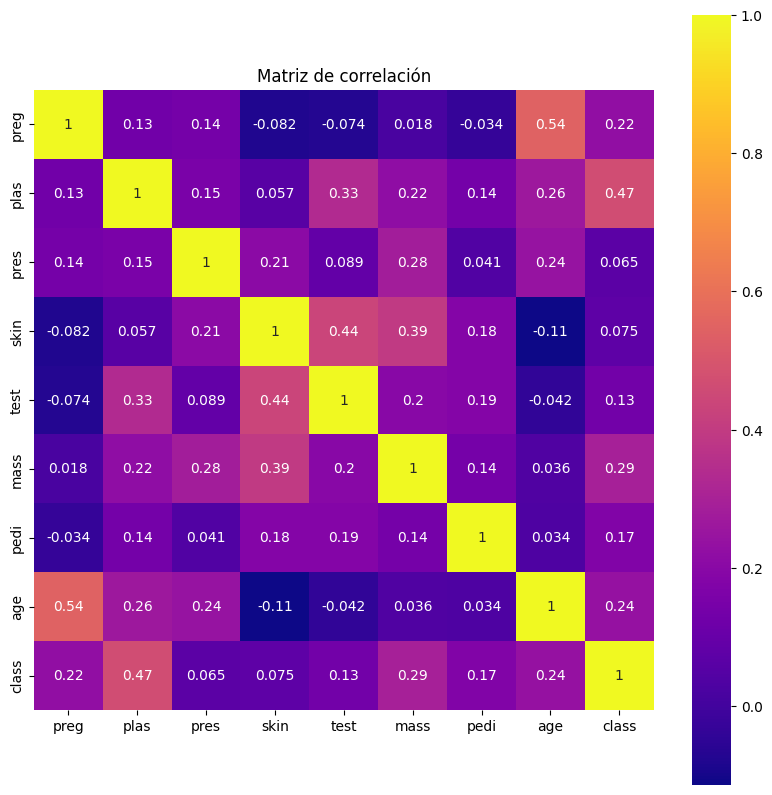

In [7]:
# Correlatioin matrix matplolib
correlation= data.corr()
plt.figure(figsize=(10, 10))
ax= sns.heatmap(correlation, vmax= 1, square=True, annot=True, cmap= 'plasma') #for change the color: just search "cmap colors"
plt.title("Matriz de correlación")
plt.show()

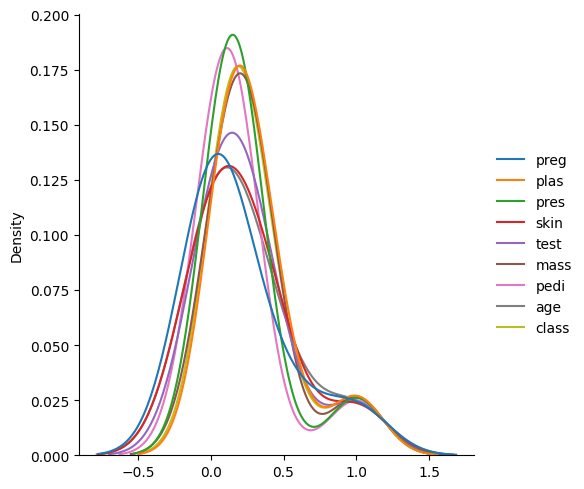

In [8]:
sns.displot(correlation, kind="kde")

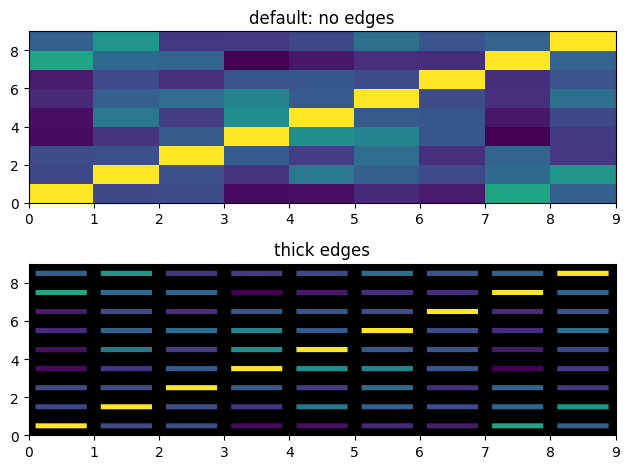

In [9]:
fig, (ax0, ax1) = plt.subplots(2,1)

c = ax0.pcolor(correlation)
ax0.set_title('default: no edges')

c = ax1.pcolor(correlation, edgecolors='k', linewidths=10)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

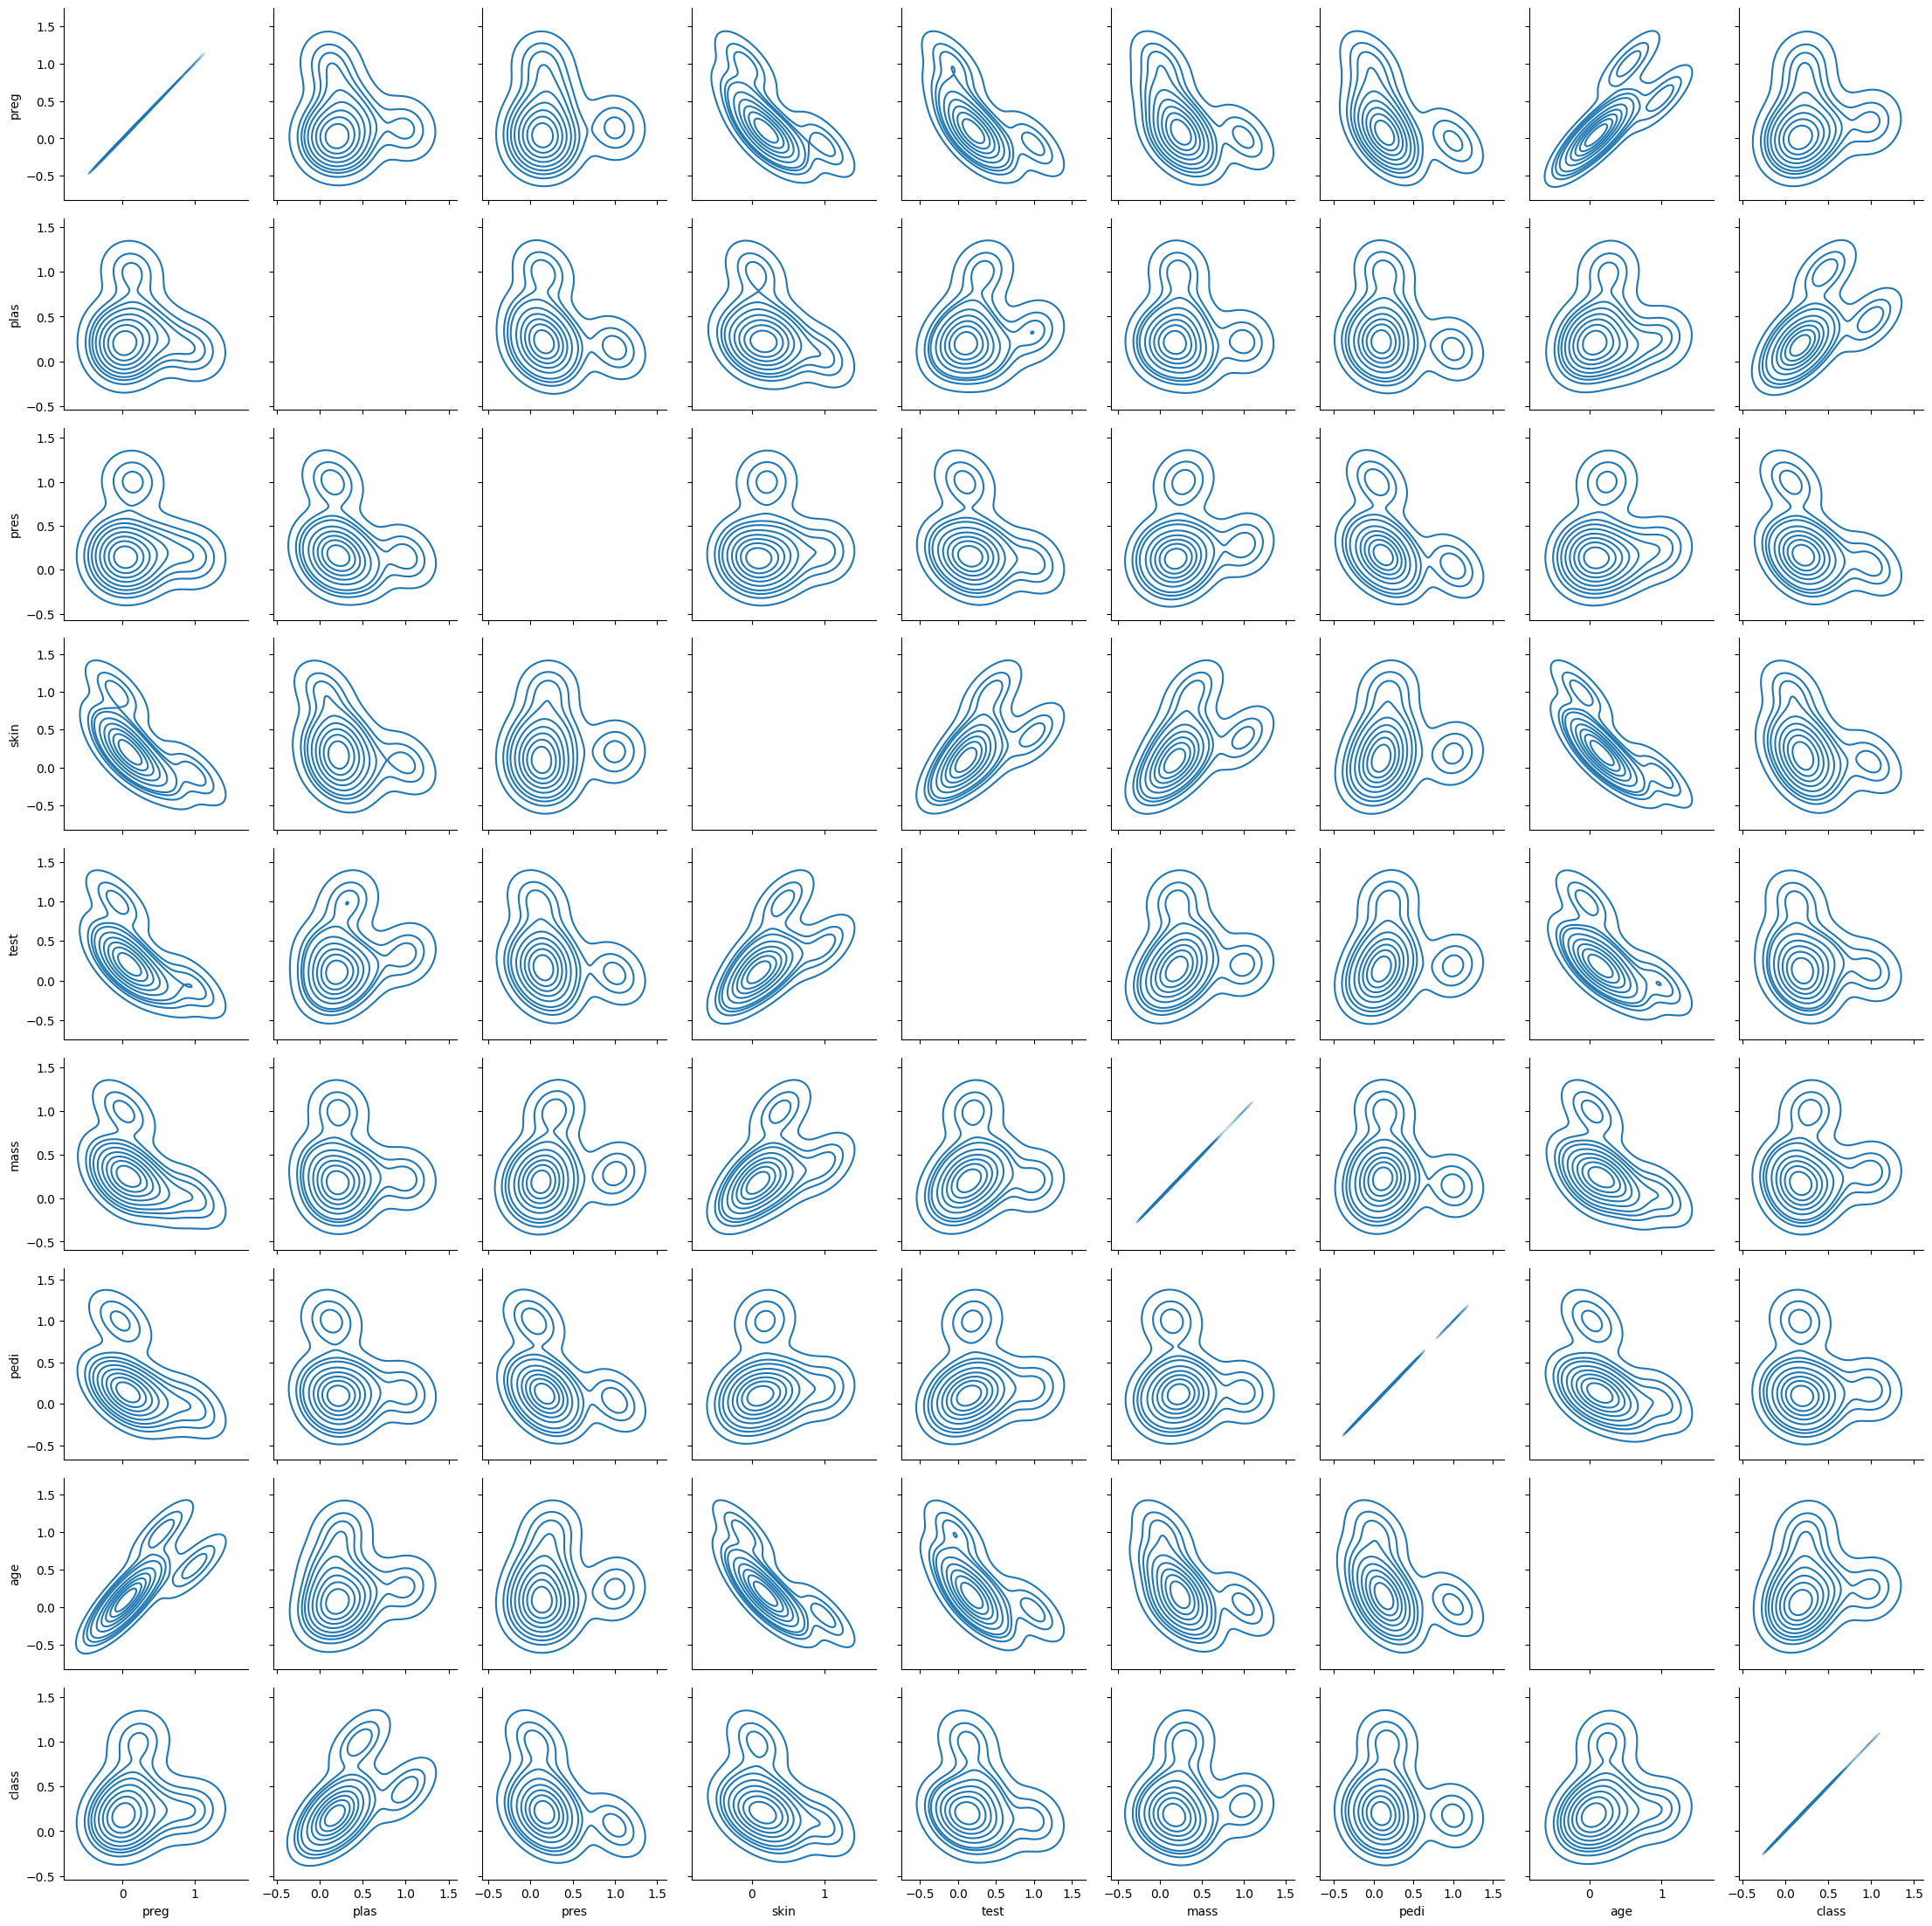

In [10]:
g= sns.PairGrid(correlation)
g.map(sns.kdeplot)

<AxesSubplot: xlabel='class', ylabel='Density'>

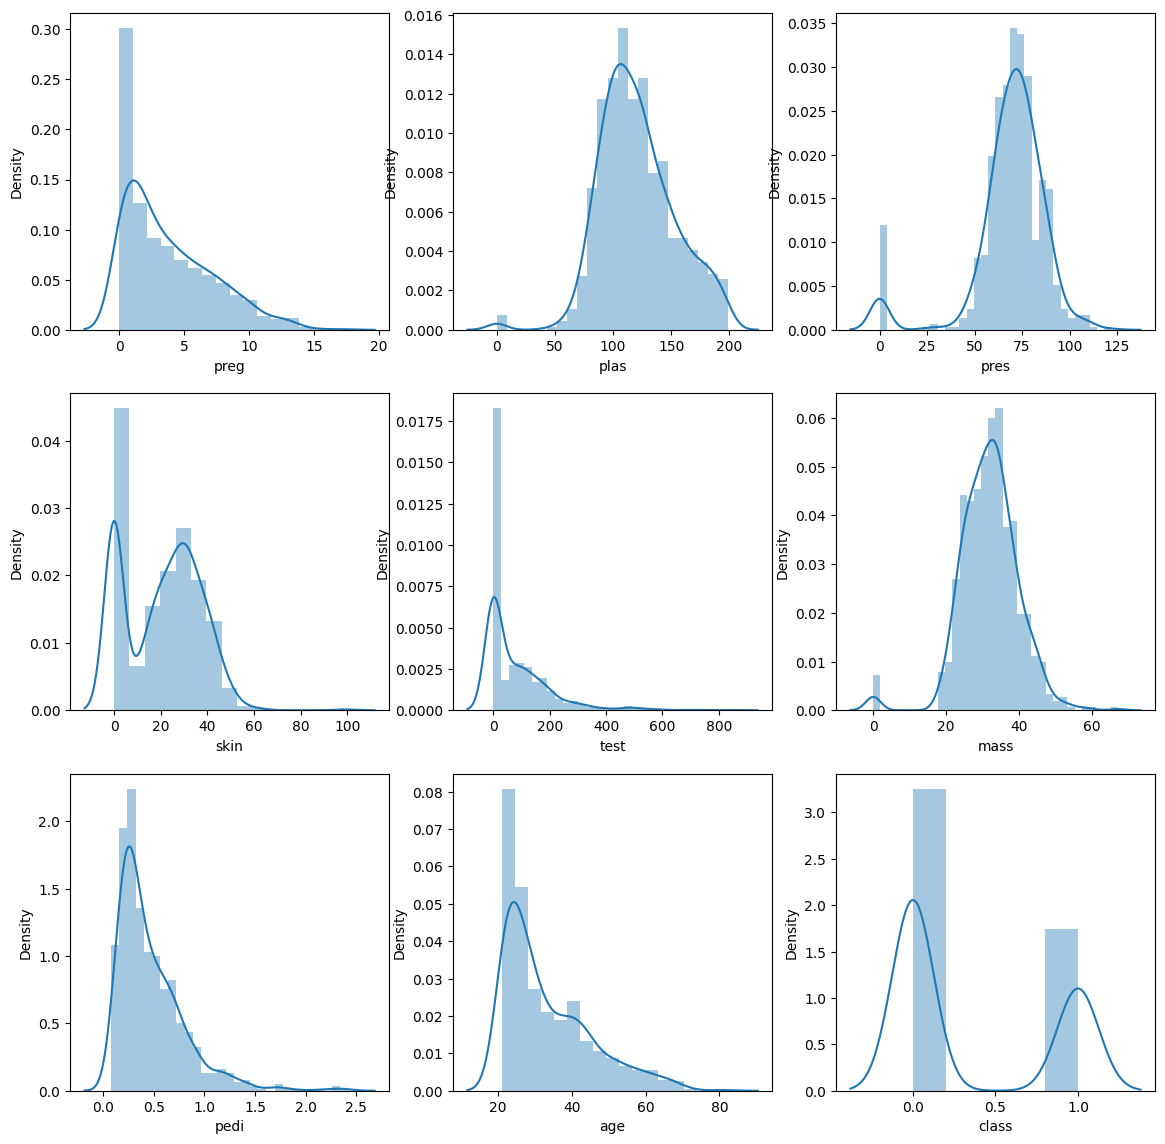

In [11]:

f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(data["preg"], ax=axes[0, 0])
sns.distplot(data["plas"], ax=axes[0, 1])
sns.distplot(data["pres"], ax=axes[0, 2])
sns.distplot(data["skin"], ax=axes[1, 0])
sns.distplot(data["test"], ax=axes[1, 1])
sns.distplot(data["mass"], ax=axes[1, 2])
sns.distplot(data["pedi"], ax=axes[2, 0])
sns.distplot(data["age"], ax=axes[2, 1])
sns.distplot(data["class"], ax=axes[2, 2])

In [12]:
array= data.values
X= array[:, 0:8] # all characteristics [ : ], from the column 0 until 8
Y= array[:, 8]

# And have the activation data, 0 y 1

In [13]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X) 
# summarize transformed data
normalizerX= scaler.transform(X) # rescaler of X to these fit data for a transformation to the values of X
print(names)
print(normalizerX[: 5, :]) # the first 5 rows and all columns

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


In [14]:
#Np to dataframe
transform_df= pd.DataFrame(normalizerX, columns= names[:8])
transform_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655
...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
766,0.006653,0.838285,0.399184,0.000000,0.000000,0.200257,0.002322,0.312694


<AxesSubplot: xlabel='class', ylabel='Density'>

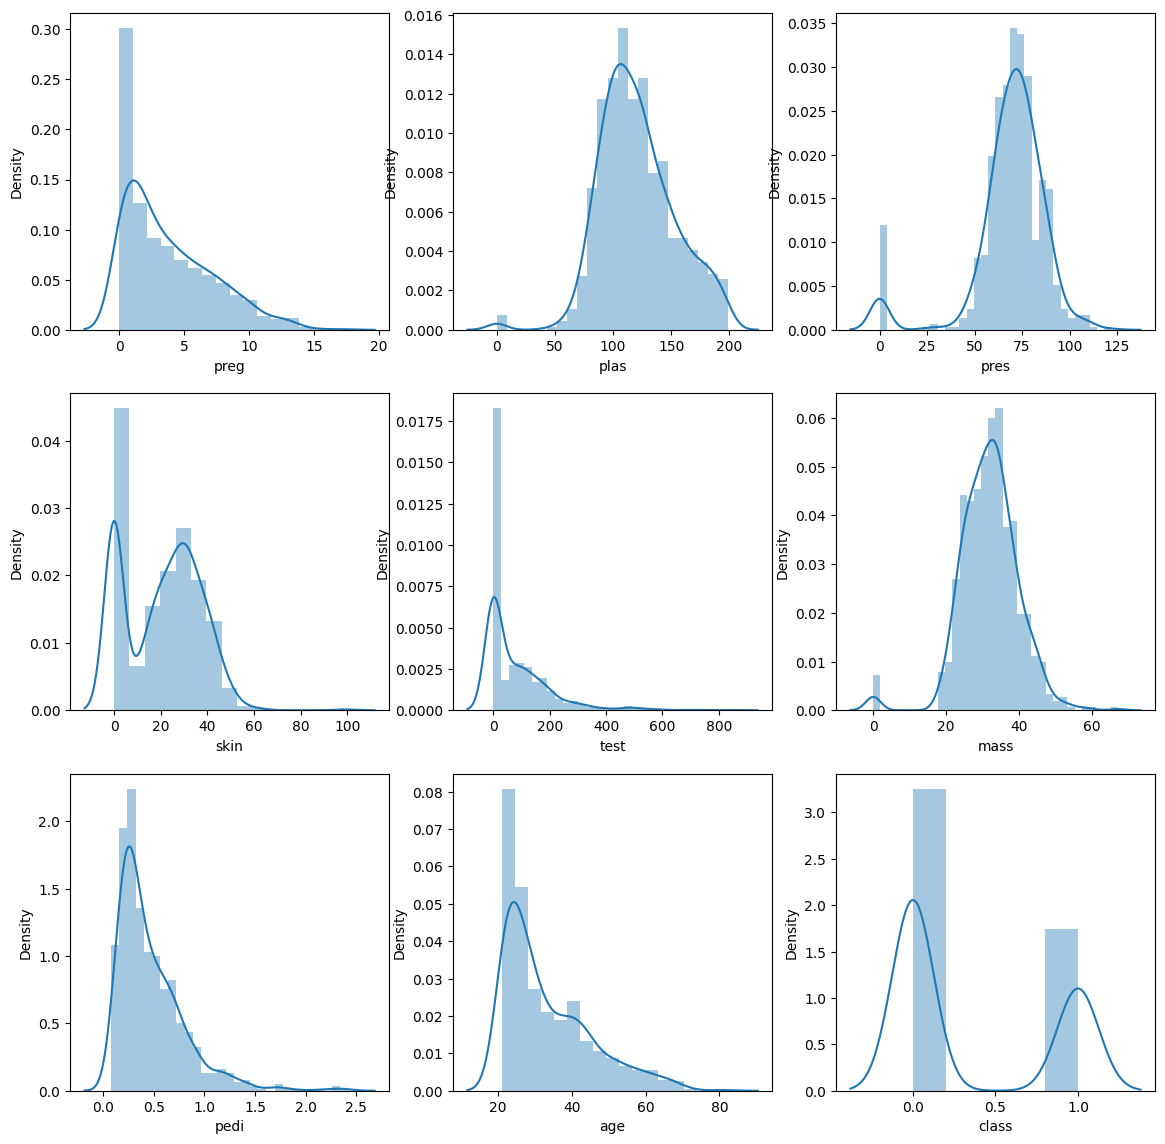

In [15]:
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(data["preg"], ax=axes[0, 0])
sns.distplot(data["plas"], ax=axes[0, 1])
sns.distplot(data["pres"], ax=axes[0, 2])
sns.distplot(data["skin"], ax=axes[1, 0])
sns.distplot(data["test"], ax=axes[1, 1])
sns.distplot(data["mass"], ax=axes[1, 2])
sns.distplot(data["pedi"], ax=axes[2, 0])
sns.distplot(data["age"], ax=axes[2, 1])
sns.distplot(data["class"], ax=axes[2, 2])

<Figure size 640x480 with 0 Axes>

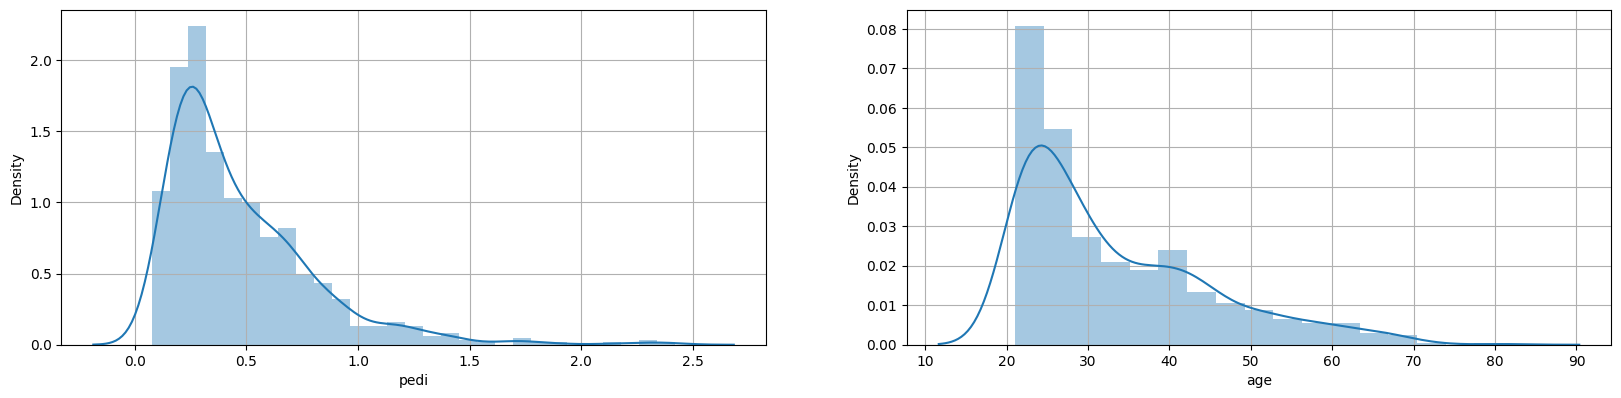

In [16]:
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)

sns.distplot(data['pedi'])
plt.grid(True)
plt.subplot(422)

sns.distplot(data['age'])
plt.grid(True)
plt.show()

#to see all characteristics  with bias

<Figure size 640x480 with 0 Axes>

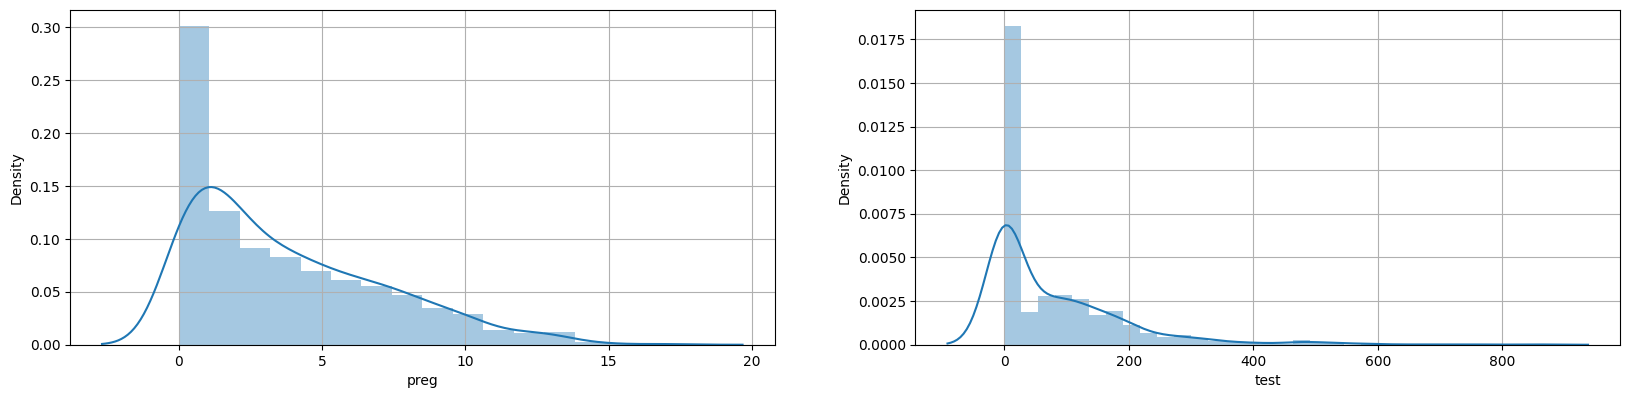

In [17]:
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)

sns.distplot(data['preg'])
plt.grid(True)
plt.subplot(422)

sns.distplot(data['test'])
plt.grid(True)
plt.show()

In [18]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
# extract features with skew
features= data[['pedi','age']]
#instatiate 
pt= PowerTransformer(method='box-cox', standardize=True)
#Fit the data to the powertransformer
skl_boxcox= pt.fit(features)
#Lets get the Lambdas that were found
calc_lambdas= skl_boxcox.lambdas_
#print (skl_boxcox.lambdas_)
#Transform the data 
skl_boxcox= pt.transform(features)
#Pass the transformed data into a new dataframe 
df_features= pd.DataFrame(data=skl_boxcox, columns=['pedi', 'age'])
# Pass to the original dataframe the transform columns
data.drop('age', 
          axis=1, #eliminate column axis 1
          inplace=True)
data.drop('pedi', 
          axis=1, #eliminate column axis 1
          inplace=True)
# concatenate both dataframes
df_data= pd.concat([data, df_features], axis=1 #add these columns in the axis 1
                   )
cols= df_data.columns.tolist()
# Pass the last to first of the list (2 times)
cols= cols[-1:]+cols[:-1] # For pass the last element to first [-1:]
cols= cols[-1:]+cols[:-1]
# Overwrite it
df_data= df_data[cols]
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.776754,1.362797,6,148,72,35,0,33.6,1
1,-0.112234,0.127990,1,85,66,29,0,26.6,0
2,0.880461,0.231506,8,183,64,0,0,23.3,1
3,-1.306876,-1.483064,1,89,66,23,94,28.1,0
4,2.629492,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-1.267799,1.764261,10,101,76,48,180,32.9,0
764,-0.162124,-0.366775,2,122,70,27,0,36.8,0
765,-0.682369,0.017237,5,121,72,23,112,26.2,0
766,-0.121179,1.236934,1,126,60,0,0,30.1,1


In [19]:
array= df_data.values
X= array[:,0:8]
Y= array[:,8]

<Figure size 640x480 with 0 Axes>

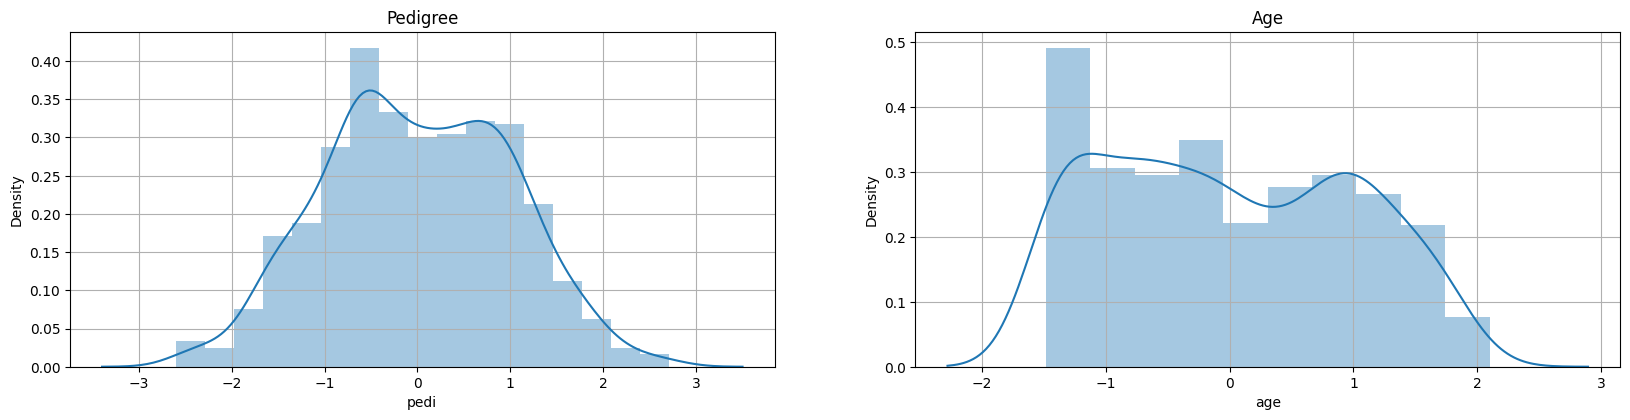

In [20]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421) 
sns.distplot(df_data['pedi']) #renamed data set like df_data
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       162
         1.0       0.69      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



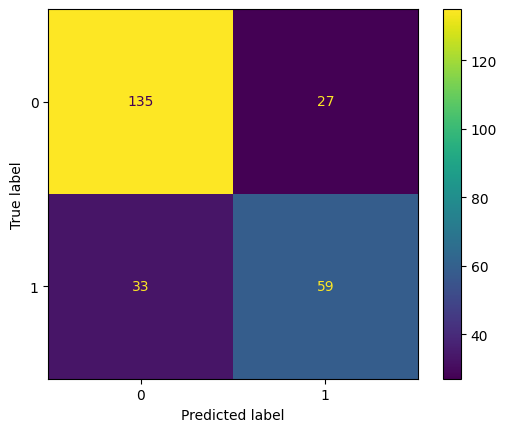

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=test_size, random_state=seed)
model = LogisticRegression(solver= 'newton-cg', max_iter= 1000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted) 

cf= confusion_matrix(Y_test, predicted)
cm_display= ConfusionMatrixDisplay(cf).plot()
print(report)

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#Compare algorithms
models= []
models.append(('LoR', LogisticRegression(solver='newton-cg', max_iter= 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('k-NN', KNeighborsClassifier(n_neighbors=11)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model
results= []
names= []
scoring= 'accuracy'

for name, model in models:
    kfold= KFold(n_splits= 10, random_state= 7, shuffle= True)
    cv_results= cross_val_score(model, X, Y, cv= kfold, scoring= scoring)
    results.append(cv_results)
    print(f"{name}: {cv_results.mean()*100.0:,.2f} ({cv_results.std()*100.0:,.2f})")


LoR: 76.56 (5.66)
LDA: 76.17 (6.07)
k-NN: 73.83 (3.52)
CART: 68.37 (5.07)
NB: 75.39 (4.73)
SVM: 65.11 (5.99)


In [23]:
for name, classifier in models:
    # Create a KFold cross-validator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(classifier, X_train, Y_train, cv=kf)
    
    # Print model name and cross-validation scores
    print(name)
    
    # Calculate and print the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"Mean Accuracy: {mean_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")
    
    # Print a separator for better readability
    print("-" * 50)

LoR
Mean Accuracy: 0.7646
Standard Deviation: 0.0485
--------------------------------------------------
LDA
Mean Accuracy: 0.7606
Standard Deviation: 0.0470
--------------------------------------------------
k-NN
Mean Accuracy: 0.7198
Standard Deviation: 0.0564
--------------------------------------------------
CART
Mean Accuracy: 0.7237
Standard Deviation: 0.0415
--------------------------------------------------
NB
Mean Accuracy: 0.7570
Standard Deviation: 0.0694
--------------------------------------------------
SVM
Mean Accuracy: 0.6574
Standard Deviation: 0.0601
--------------------------------------------------


Accuracy: 80.52 (0.00)
Mean Accuracy: 0.8052
Standard Deviation: 0.0000
--------------------------------------------------
0.8051948051948052


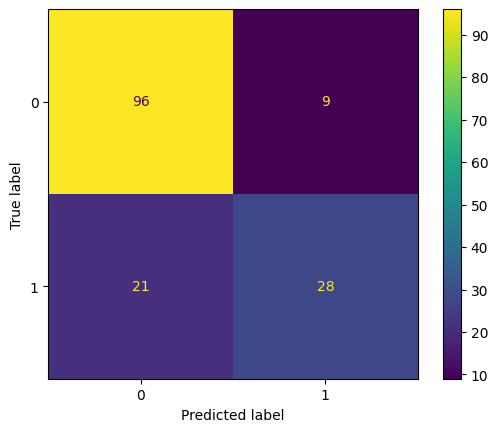

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate the partition
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=99)
forest= RandomForestClassifier(n_estimators= 300, random_state= 9, 
                               criterion= 'gini', 
                               min_samples_split= 2, 
                               min_samples_leaf= 5,
                               max_leaf_nodes= 7)
# Train algorithm
forest.fit(X_train, Y_train)

# Extract the importances 
importance= forest.feature_importances_
Y_pred= forest.predict(X_test)
scores= accuracy_score(Y_test, Y_pred)
# print(f"Error (with all variables): {scores}")

print(f"Accuracy: {scores.mean()*100.0:,.2f} ({scores.std()*100.0:,.2f})")

mean_score = np.mean(scores)
std_score = np.std(accuracy_score(Y_test, Y_pred))
print(f"Mean Accuracy: {mean_score:.4f}")
print(f"Standard Deviation: {std_score:.4f}")
    
    # Print a separator for better readability
print("-" * 50)

cf= confusion_matrix(Y_test, Y_pred)
cm_display= ConfusionMatrixDisplay(cf).plot()
print(scores)

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Clasification problem
filename_clas = 'pima-indians-diabetes.data.csv'
names_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df_clas = pd.read_csv(filename_clas, names=names_clas)
array_clas = df_clas.values
X_clas = array_clas[:,0:8]
Y_clas = array_clas[:,8]


kfold= KFold(n_splits=5, random_state=7, shuffle=True)
model= LogisticRegression(solver= 'lbfgs', max_iter=1000)
scoring= 'accuracy'
results= cross_val_score(model, X_clas, Y_clas, cv=kfold, scoring=scoring)
print(f"Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f})")


Accuracy: 77.47% (1.91)
